<a href="https://colab.research.google.com/github/aparajitaks/Drug_Response_ML/blob/main/03_Model_Building.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

clean_path = "/content/drive/MyDrive/Drug-Response-ML/data/processed/feature_data.csv"
df = pd.read_csv(clean_path)

df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,uniqueID,drugName,condition,review,rating,date,usefulCount,response_category
0,206461,valsartan,left ventricular dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,2
1,95260,guanfacine,adhd,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,2
2,92703,lybrel,birth control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,1
3,138000,ortho evra,birth control,"""This is my first time using any form of birth...",8,3-Nov-15,10,2
4,35696,buprenorphine / naloxone,opiate dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,2


Define Features & Target

In [2]:
features=['drugName','condition','usefulCount']
target='response_category'

X = df[features]
y = df[target]

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (215063, 3)
y shape: (215063,)


Encode Categorical Data

In [3]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

cat_features = ["drugName", "condition"]
num_features = ["usefulCount"]

preprocessor = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features),
    ("num", "passthrough", num_features)
])


Train-Test Split


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


Baseline Model – Logistic Regression

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

log_model = Pipeline([
    ("preprocess", preprocessor),
    ("model", LogisticRegression(
        max_iter=3000,
        class_weight="balanced",
        n_jobs=-1
    ))
])

log_model.fit(X_train, y_train)

y_pred = log_model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.43      0.56      0.49     10715
           1       0.20      0.35      0.25      6346
           2       0.81      0.56      0.66     25952

    accuracy                           0.53     43013
   macro avg       0.48      0.49      0.47     43013
weighted avg       0.62      0.53      0.56     43013



In [7]:
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

svm_model = Pipeline([
    ("preprocess", preprocessor),
    ("model", LinearSVC(
        class_weight="balanced",
        max_iter=5000
    ))
])

svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)
print(classification_report(y_test, y_pred_svm))




              precision    recall  f1-score   support

           0       0.44      0.56      0.49     10715
           1       0.24      0.12      0.16      6346
           2       0.74      0.74      0.74     25952

    accuracy                           0.60     43013
   macro avg       0.47      0.47      0.46     43013
weighted avg       0.59      0.60      0.59     43013



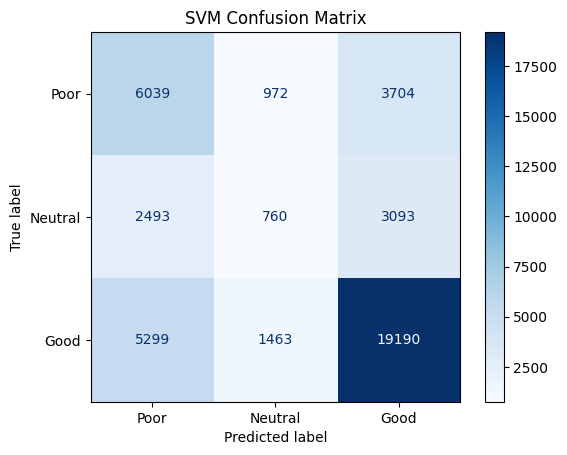

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Poor", "Neutral", "Good"])

disp.plot(cmap="Blues")
plt.title("SVM Confusion Matrix")
plt.show()
